### Portfolio Theory matrix Part Deux
### Optimize Portfolio weights using Matrix Algebra

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
from scipy.optimize import minimize

In [2]:
###import sp 500 and gold 
tickers = ['^GSPC','GC=F']
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [4]:
#log returns 
ret_df =np.log(df/df.shift(1))

<AxesSubplot:xlabel='Date'>

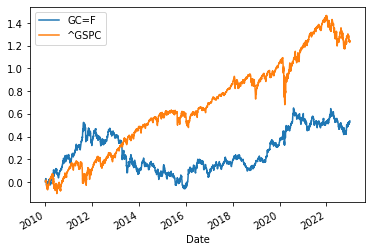

In [7]:
ret_df.cumsum().plot()

In [8]:
#weights vector 
W = np.ones(len(ret_df.columns))/np.ones(len(ret_df.columns)).sum()
W

array([0.5, 0.5])

In [9]:
#claculate the Sharpe ratio

def sharpe_pf(W,returns):
    pf_risk = (W.dot(returns.cov()).dot(W))**0.5
    SR = W.dot(returns.mean())/ pf_risk
    #return Sharpe Ratio as a negative quantity in orde to minimize value 
    return -SR

In [10]:
sharpe_pf(W,ret_df)

-0.03509382181287497

In [12]:
#create a constraint for the portfolio
cons = ({"type":'eq', 'fun':lambda x: np.sum(x)-1})

res = minimize(sharpe_pf,W,ret_df,constraints=cons)
res
#note! according to the output of minimize, it's optima to over weight the second asset in order to maximize the sharpe ratio

     fun: -0.03683771718159994
     jac: array([ 1.59551855e-04, -7.84671865e-05])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.32966895, 0.67033105])

In [13]:
#allocate optimal weights
opt_W = res['x']
opt_W

array([0.32966895, 0.67033105])

In [69]:
platz = pd.DataFrame(ret_df.dot(W).cumsum())
gates = pd.DataFrame(ret_df.dot(opt_W).cumsum())
sret = pd.concat([platz,gates],axis=1)
sret.columns = ['normal','optimized']
sret
#note! return is greater using the optimized weighted portfolio 

,normal,optimized
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001734,0.002203
2010-01-06,0.009904,0.007776
2010-01-07,0.010667,0.009639
2010-01-08,0.014351,0.013048
...,...,...
2022-12-23,0.894993,1.023429
2022-12-27,0.898198,1.024160
2022-12-28,0.890247,1.014797


<AxesSubplot:xlabel='Date'>

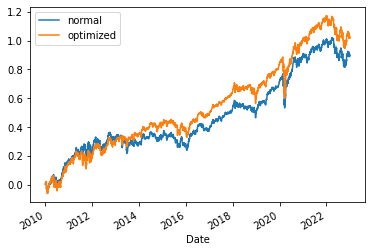

In [70]:
sret.plot()

In [72]:
np.arange(0,1,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [74]:
#manually calculate the sharpe ratios
sharpes = []

for w in np.arange(0,1,0.01):
    weights = w, 1-w
    weights = np.array(weights)
    print(weights)
    sharpes.append(sharpe_pf(weights,ret_df))

[0. 1.]
[0.01 0.99]
[0.02 0.98]
[0.03 0.97]
[0.04 0.96]
[0.05 0.95]
[0.06 0.94]
[0.07 0.93]
[0.08 0.92]
[0.09 0.91]
[0.1 0.9]
[0.11 0.89]
[0.12 0.88]
[0.13 0.87]
[0.14 0.86]
[0.15 0.85]
[0.16 0.84]
[0.17 0.83]
[0.18 0.82]
[0.19 0.81]
[0.2 0.8]
[0.21 0.79]
[0.22 0.78]
[0.23 0.77]
[0.24 0.76]
[0.25 0.75]
[0.26 0.74]
[0.27 0.73]
[0.28 0.72]
[0.29 0.71]
[0.3 0.7]
[0.31 0.69]
[0.32 0.68]
[0.33 0.67]
[0.34 0.66]
[0.35 0.65]
[0.36 0.64]
[0.37 0.63]
[0.38 0.62]
[0.39 0.61]
[0.4 0.6]
[0.41 0.59]
[0.42 0.58]
[0.43 0.57]
[0.44 0.56]
[0.45 0.55]
[0.46 0.54]
[0.47 0.53]
[0.48 0.52]
[0.49 0.51]
[0.5 0.5]
[0.51 0.49]
[0.52 0.48]
[0.53 0.47]
[0.54 0.46]
[0.55 0.45]
[0.56 0.44]
[0.57 0.43]
[0.58 0.42]
[0.59 0.41]
[0.6 0.4]
[0.61 0.39]
[0.62 0.38]
[0.63 0.37]
[0.64 0.36]
[0.65 0.35]
[0.66 0.34]
[0.67 0.33]
[0.68 0.32]
[0.69 0.31]
[0.7 0.3]
[0.71 0.29]
[0.72 0.28]
[0.73 0.27]
[0.74 0.26]
[0.75 0.25]
[0.76 0.24]
[0.77 0.23]
[0.78 0.22]
[0.79 0.21]
[0.8 0.2]
[0.81 0.19]
[0.82 0.18]
[0.83 0.17]
[0.84 0.16]


<AxesSubplot:>

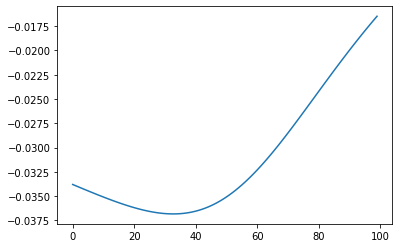

In [75]:
pd.Series(sharpes).plot()

In [78]:
#Create trainning and testing datasets using specific percentages 
train = ret_df[:int(len(ret_df) * 0.7)]
test = ret_df[int(len(ret_df) * 0.7):]


In [79]:
res_train = minimize(sharpe_pf, W, train, constraints=cons)
res_train

     fun: -0.041063445081713605
     jac: array([ 4.17898409e-05, -8.46851617e-06])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.16849933, 0.83150067])

In [80]:
test.dot(res_train['x']).cumsum()

Date
2019-02-11   -0.000272
2019-02-12    0.010661
2019-02-13    0.013377
2019-02-14    0.011041
2019-02-15    0.021102
                ...   
2022-12-23    0.363175
2022-12-27    0.361565
2022-12-28    0.350867
2022-12-29    0.366339
2022-12-30    0.365202
Length: 982, dtype: float64

In [81]:
test.dot(W).cumsum()
#note! the returns on the optimized weights above are still superior, albeit marginally

Date
2019-02-11   -0.002202
2019-02-12    0.005043
2019-02-13    0.007163
2019-02-14    0.005454
2019-02-15    0.014022
                ...   
2022-12-23    0.342767
2022-12-27    0.345973
2022-12-28    0.338021
2022-12-29    0.349874
2022-12-30    0.351507
Length: 982, dtype: float64

In [83]:
print(f"Optimized Sharpe Ratio for test data: {sharpe_pf(res_train['x'],test)}")
print(f"Equal weights Sharpe Ratio for test data: {sharpe_pf(W,test)}")

Optimized Sharpe Ratio for test data: -0.030000043576712435
Equal weights Sharpe Ratio for test data: -0.03829920023464261
